In [1]:
# Your work for Part 1 here!
# Remember to organize your work by including your own markdown cells!

# Predicting Housing Prices


## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)
# Sets the default figure size to width 10, and height 5

In [4]:
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Data Loading

In [5]:
df = pd.read_csv('../data/ameshousing.csv')
# reads in the dataset as a dataframe from the csv

## Explore the Data

In [6]:
df.head()
# displays the first 5 rows of data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.info()
# displays information about the dataframe, like dtypes, non-null values, etc. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
df.describe()
# provides statistical summaries for the numeric columns

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
df.describe(include='O')
# provides statistical summaries for the object columns. 

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,1155,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,4,4,5,6,5,5,4,6,6,6,5,2,5,5,8,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,880,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1494,2728,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


## Data Cleaning

In [10]:
num_of_nas = df.isna().sum().reset_index()
num_of_nas.columns = ['Column', '# of NAs']
num_of_nas
# the above gathers the number of NaNs for each column

,Column,# of NAs
0,Order,0
1,PID,0
2,MS SubClass,0
3,MS Zoning,0
4,Lot Frontage,490
5,Lot Area,0
6,Street,0
7,Alley,2732
8,Lot Shape,0
9,Land Contour,0


In [11]:
dtypes = df.dtypes.reset_index()
dtypes.columns = ['Column', 'Dtype']
# the above gets the dtype of each column

In [12]:
overview = pd.merge(num_of_nas, dtypes, on='Column').sort_values(by='# of NAs', ascending=False)
overview.head()
# these lines merge the num_of_nas and dtypes dataframes, so that I can see both the number of missing values, as well the dtype

,Column,# of NAs,Dtype
73,Pool QC,2917,object
75,Misc Feature,2824,object
7,Alley,2732,object
74,Fence,2358,object
26,Mas Vnr Type,1775,object


In [13]:
mask = overview["Dtype"] == 'object'
# this makes a mask for filtering the overview dataframe for each column with a dtype of 'object'

In [14]:
object_columns_with_na = overview[(mask) & (overview['# of NAs'] > 0)]
# this uses the mask made before to create a dataframe of all the object columms, 
# where there are missing values (# of NAs is greater than 0)

In [15]:
numerical_columns_with_na = overview[(~mask) & (overview['# of NAs'] > 0)]
# this uses the inverse of the mask made before to create a dataframe of all the numeric columms, 
# where there are missing values (# of NAs is greater than 0)

In [16]:
object_columns_with_na
# outputs the object_columns_with_na dataframe

,Column,# of NAs,Dtype
73,Pool QC,2917,object
75,Misc Feature,2824,object
7,Alley,2732,object
74,Fence,2358,object
26,Mas Vnr Type,1775,object
58,Fireplace Qu,1422,object
65,Garage Cond,159,object
61,Garage Finish,159,object
64,Garage Qual,159,object
59,Garage Type,157,object


In [17]:
numerical_columns_with_na
# outputs the numerical_columns_with_na dataframe

,Column,# of NAs,Dtype
4,Lot Frontage,490,float64
60,Garage Yr Blt,159,float64
27,Mas Vnr Area,23,float64
48,Bsmt Full Bath,2,float64
49,Bsmt Half Bath,2,float64
35,BsmtFin SF 1,1,float64
62,Garage Cars,1,float64
39,Total Bsmt SF,1,float64
38,Bsmt Unf SF,1,float64
37,BsmtFin SF 2,1,float64


### Fill NAs of Numerical Columns

In [18]:
def hist_mean_median(column):
    """
    Creator: Daniel Gallo
    Inputs: Column Name
    Outputs: a histogram of the distribution of the column, and lines for the mean and median values
    """
    sns.histplot(data=df, x=column)
    plt.axvline(x = df[column].mean(), color='red', label='Mean')
    plt.axvline(x = df[column].median(), color='green', label='Median')
    plt.legend()

#### Lot Frontage

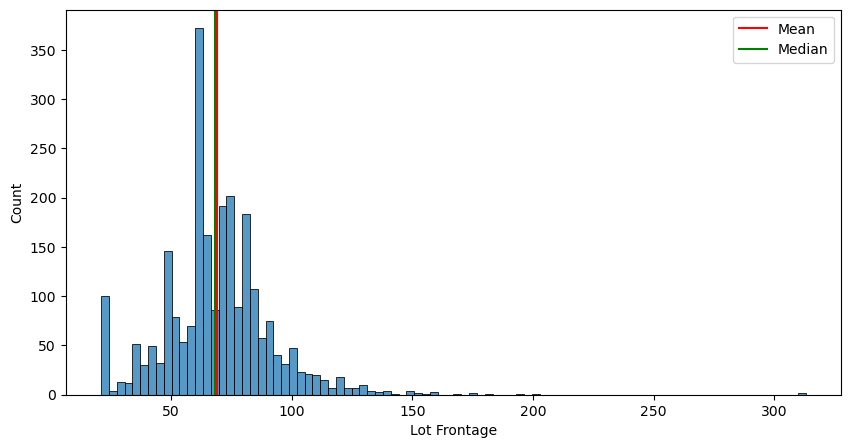

In [19]:
hist_mean_median('Lot Frontage')

> We can see in the above histgram that the median and mean are nearly the same. There are a few outliers, but these rows may be important, so we will not remove them. As such, we will impute with the median the missing values. 

In [20]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
# Imputes the missing values in Lot Frontage with the median

#### Garage Yr Blt

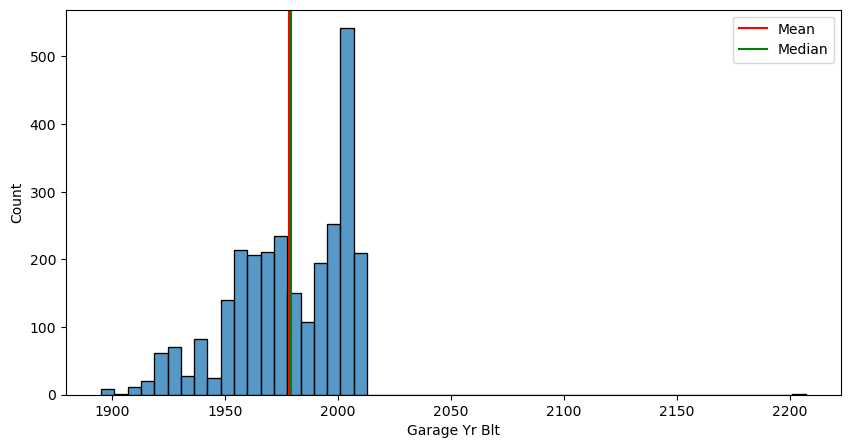

In [21]:
hist_mean_median('Garage Yr Blt')

> We can see there is an outlier, but the outlier is a year yet to come, so we will replace it with a NaN value for now. 

In [22]:
# sets index 2260, column Garage Yr Blt to NaN, as the year has not passed yet (2207)
df.loc[2260, 'Garage Yr Blt'] = np.NaN

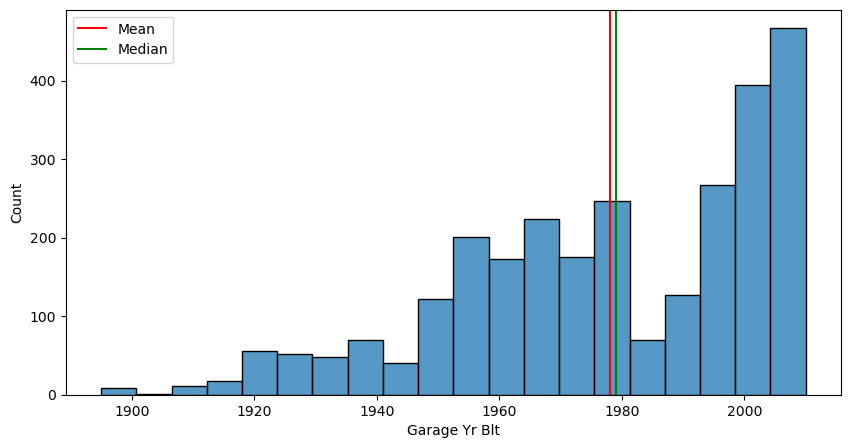

In [23]:
hist_mean_median('Garage Yr Blt')

> As this is a left skewed histogram, we will use the median as the outlier filler here as well. Also, in checking the correlations, filling the NaNs with the median does not have a large affect on the correlatio coefficent (changes from 0.53 to 0.51), so we can fill it with the median. I also checked with get_dummies to see correlatiosn between each type of garage, and ultimately, do not believe it will have much of an affect on the model. 

In [24]:
garages = df[['Year Built', 'Garage Yr Blt', 'Garage Type', 'SalePrice']]
# creates a subset of df with just year built, garage yr blt, garage type, and sale price

In [25]:
garage_dummies = pd.get_dummies(garages, columns=['Garage Type'], drop_first=True, dummy_na=True)
# creates a dataframe with garage type converted to dummy values to check correlations with sale price

In [26]:
garage_dummies.corr()['SalePrice']
# shows correlations for the sale price column with the other columns in garage_dummies. 

Year Built             0.558426
Garage Yr Blt          0.531494
SalePrice              1.000000
Garage Type_Attchd     0.345635
Garage Type_Basment   -0.042342
Garage Type_BuiltIn    0.223439
Garage Type_CarPort   -0.067564
Garage Type_Detchd    -0.365074
Garage Type_nan       -0.225950
Name: SalePrice, dtype: float64

> This shows the correlations of each garage type to the sale price. Correlation seems to be positive for attached, but negative for detached. Other than that, correlation is very low. 

In [27]:
# garages[garages['Garage Yr Blt'].isna()]

In [28]:
# df.loc[df['Garage Type'].isna(), 'Garage Yr Blt'] = df.loc[df['Garage Type'].isna(), 'Garage Yr Blt'].fillna(0)

In [29]:
# sns.scatterplot(data=df, x='Garage Yr Blt', y='Year Built')

In [30]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median())
# Imputes garage year built with median year, so as to not affect the correlation too much when filling in missing values. 

#### Mas Vnr Area

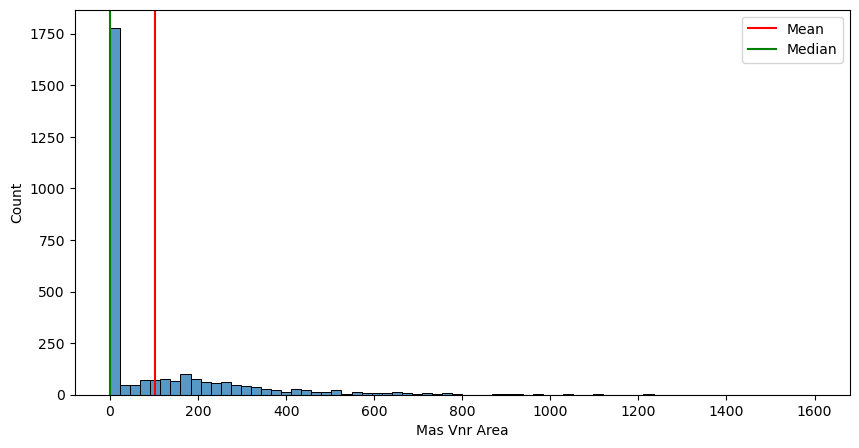

In [31]:
hist_mean_median('Mas Vnr Area')

> The above histogram shows that the median is 0, while the mean is higher. However, the median being 0 is a bit odd, so let's look further. 

<Axes: ylabel='Mas Vnr Area'>

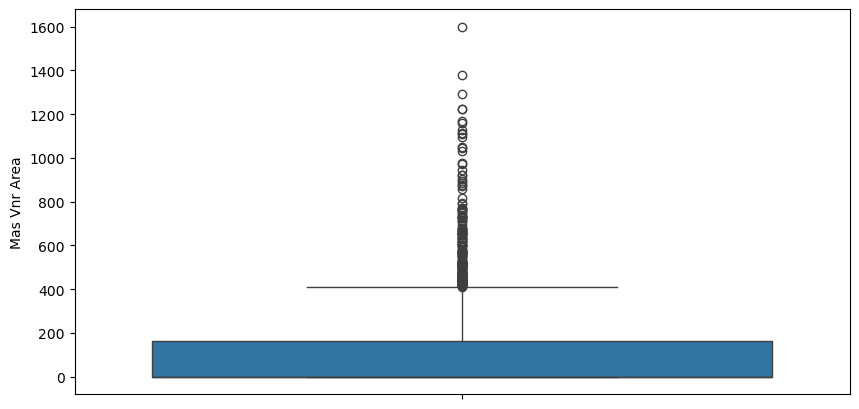

In [32]:
sns.boxplot(df['Mas Vnr Area'])

> This boxplot shows us that many values are 0, which is bringing the median and percentiles down. 

In [33]:
masonry_veneer = df[['Mas Vnr Type', 'Mas Vnr Area']]

> An NA value in Mas Vnr Type means there is no Masonry Veneer, and so the area would be 0. 

In [34]:
masonry_veneer[(masonry_veneer['Mas Vnr Type'].notna()) & (masonry_veneer['Mas Vnr Area'].isna())]

,Mas Vnr Type,Mas Vnr Area


> All the rows where Mas Vnr Area is NaN, the type is also NaN, meaning there is no masonry veneer, so it should be 0 for those rows.  

In [35]:
masonry_veneer[masonry_veneer['Mas Vnr Area'].isna()]

,Mas Vnr Type,Mas Vnr Area
55,NaN,NaN
484,NaN,NaN
517,NaN,NaN
538,NaN,NaN
867,NaN,NaN
1095,NaN,NaN
1119,NaN,NaN
1122,NaN,NaN
1127,NaN,NaN
1184,NaN,NaN


In [36]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
# fills in the missing values in Mas Vnr Area with 0s, as all the rows where it is 0, the house does not have a masonry veneer

In [37]:
df.isna().sum()
# shows the number of missing values in each column 

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

The rest of the numerical columns will be dropped at the end, as there is only one or 2 rows for each of the remaining numerical columns that have missing values. 

### Fill NAs of Object Columns

In [38]:
object_columns_with_na
# outputs the object_columns_with_na dataframe

,Column,# of NAs,Dtype
73,Pool QC,2917,object
75,Misc Feature,2824,object
7,Alley,2732,object
74,Fence,2358,object
26,Mas Vnr Type,1775,object
58,Fireplace Qu,1422,object
65,Garage Cond,159,object
61,Garage Finish,159,object
64,Garage Qual,159,object
59,Garage Type,157,object


For the object columns, I will check the data dictionary. For the most part, it seems that NaN means not applicable. Like for Pool QC, NaN means there is no pool 

In [39]:
df['Pool QC'] = df['Pool QC'].fillna("No Pool")

In [40]:
df['Misc Feature'] = df['Misc Feature'].fillna("No Misc Features")

In [41]:
df['Alley'] = df['Alley'].fillna("No Alley Access")

In [42]:
df['Fence'] = df['Fence'].fillna("No Fence")

In [43]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("No Masonry Veneer")

In [44]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("No Fireplace")

In [45]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']].fillna("No Garage")

In [46]:
df[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']] = df[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']].fillna("No Basement")

In [47]:
df = df.dropna()
# drops the remaining rows that have NA values

In [48]:
df.shape
# only 4 rows were dropped. 

(2926, 82)

In [49]:
df.isna().sum()
# now we can see there are no more missing values. 

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

NaN values are Filled

In [50]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,No Pool,No Fence,No Misc Features,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,No Masonry Veneer,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No Pool,MnPrv,No Misc Features,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,No Alley Access,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,No Masonry Veneer,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,No Misc Features,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,No Masonry Veneer,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No Pool,MnPrv,No Misc Features,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No Pool,No Fence,No Misc Features,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,No Masonry Veneer,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,No Fireplace,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,No Pool,No Fence,No Misc Features,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,No Alley Access,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,No Masonry Veneer,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No F

## Feature Engineering

In this section, I will be converting the object columns to categorical columns where necessary. 

The nominal columns (no order needs to be specified), will be converted to categorical via `.astype()`.

The ordinal columns (there does need to be an order specified) will be converted using pandas Categorical type. 

In [51]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [52]:
nomial_columns = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']
# list of columns with nominal categories, according to the data dictionary. 
ordinal_columns = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
# list of columns with ordinal categories, according to the data dictionary.

In [53]:
len(nomial_columns)

23

In [54]:
# df.info()

In [55]:
df[nomial_columns] = df[nomial_columns].astype('category')
# converts each of the nominal columns to category dtype

In [56]:
df.info()
# checking the dtypes of the columns 

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Order            2926 non-null   int64   
 1   PID              2926 non-null   category
 2   MS SubClass      2926 non-null   category
 3   MS Zoning        2926 non-null   category
 4   Lot Frontage     2926 non-null   float64 
 5   Lot Area         2926 non-null   int64   
 6   Street           2926 non-null   category
 7   Alley            2926 non-null   object  
 8   Lot Shape        2926 non-null   object  
 9   Land Contour     2926 non-null   category
 10  Utilities        2926 non-null   object  
 11  Lot Config       2926 non-null   category
 12  Land Slope       2926 non-null   object  
 13  Neighborhood     2926 non-null   category
 14  Condition 1      2926 non-null   category
 15  Condition 2      2926 non-null   category
 16  Bldg Type        2926 non-null   category
 17  

Nomial Columns are now categorical columns

In [57]:
for col in ordinal_columns:
    print(f"{col}: {df[col].nunique()}")
# outputs the number of unique categories for each ordinal column 

Lot Shape: 4
Utilities: 3
Land Slope: 3
Overall Qual: 10
Overall Cond: 9
Exter Qual: 4
Exter Cond: 5
Bsmt Qual: 6
Bsmt Cond: 6
Bsmt Exposure: 5
BsmtFin Type 1: 7
BsmtFin Type 2: 7
Heating QC: 5
Electrical: 5
Kitchen Qual: 5
Functional: 8
Fireplace Qu: 6
Garage Finish: 4
Garage Qual: 6
Garage Cond: 6
Paved Drive: 3
Pool QC: 5
Fence: 5


In [58]:
def to_category(column, categories):
    """
    Creator: Daniel Gallo
    Inputs: column name, cateogies list in order
    Outputs: an ordered categorical column of the column passed in 
    """
    return pd.Categorical(column, categories=categories, ordered=True)

In [59]:
df['Lot Shape'] = pd.Categorical(df['Lot Shape'], categories = ['IR3', 'IR2', 'IR1', 'Reg'], ordered=True)
# converts Lot Shape to an ordered categorical column

In [60]:
df['Utilities'] =  pd.Categorical(df['Utilities'], categories=['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], ordered=True)
# converts Utilities to an ordered categorical column

In [61]:
df['Land Slope'] = to_category(df['Land Slope'], ['Gtl', 'Mod', 'Sev'])

In [62]:
df['Overall Qual'] = to_category(df['Overall Qual'], [1,2,3,4,5,6,7,8,9,10])
df['Overall Cond'] = to_category(df['Overall Cond'], [1,2,3,4,5,6,7,8,9,10])

In [63]:
df['Exter Qual'] = to_category(df['Exter Qual'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'])
df['Exter Cond'] = to_category(df['Exter Cond'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'])

In [64]:
df['Bsmt Qual'] = to_category(df['Bsmt Qual'], ['No Basement', 'Po' ,'Fa', 'TA', 'Gd', 'Ex'])
df['Bsmt Cond'] = to_category(df['Bsmt Cond'], ['No Basement', 'Po' ,'Fa', 'TA', 'Gd', 'Ex'])

In [65]:
df['Bsmt Exposure'] = to_category(df['Bsmt Exposure'], ['No Basement', 'No', 'Mn' ,'Av', 'Gd'])

In [66]:
df['BsmtFin Type 1'] = to_category(df['BsmtFin Type 1'], ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
df['BsmtFin Type 2'] = to_category(df['BsmtFin Type 2'], ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

In [67]:
df['Heating QC'] = to_category(df['Heating QC'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'])

In [68]:
df['Electrical'] = to_category(df['Electrical'], ['FuseP', 'FuseF', 'FuseA', 'SBrkr', 'Mix'])

In [69]:
df['Kitchen Qual'] = to_category(df['Kitchen Qual'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'])

In [70]:
df['Functional'] = to_category(df['Functional'], ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod' ,'Min2', 'Min1', 'Typ'])

In [71]:
df['Fireplace Qu'] = to_category(df['Fireplace Qu'], ['No Fireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

In [72]:
df['Garage Finish'] = to_category(df['Garage Finish'], ['No Garage', 'Unf', 'RFn', 'Fin'])

In [73]:
df['Garage Qual'] = to_category(df['Garage Qual'], ['No Garage', 'Po' ,'Fa', 'TA', 'Gd', 'Ex'])
df['Garage Cond'] = to_category(df['Garage Cond'], ['No Garage', 'Po' ,'Fa', 'TA', 'Gd', 'Ex'])

In [74]:
df['Paved Drive'] = to_category(df['Paved Drive'], ['N', 'P', 'Y'])

In [75]:
df['Pool QC'] = to_category(df['Pool QC'], ['No Pool', 'Fa', 'TA', 'Gd', 'Ex'])

In [76]:
df['Fence'] = to_category(df['Fence'], ['No Fence', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])

Categorical Columns are now converted to proper categories. 

In [77]:
df['Total Full Bath'] = df['Full Bath'] + df['Bsmt Full Bath']
# creates a new column, Total Full Bath, which is the sum of Full Bath (above ground) and Basement Full Bath
df['Total Half Bath'] = df['Half Bath'] + df['Bsmt Half Bath']
# creates a new column, Total Half Bath, which is the sum of Half Bath (above ground) and Basement Half Bath

## Outlier Handling

In [78]:
numeric_columns = df.select_dtypes(include=np.number).columns
# gets the numeric columns in the dataframe

In [79]:
numeric_columns

Index(['Order', 'Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'Total Full Bath', 'Total Half Bath'],
      dtype='object')

In [80]:
# for col in numeric_columns:
#     sns.boxplot(data=df, x=col)
#     plt.show()

> The above line made boxplots for each numeric column to check for outliers.
> I have commented it out for cleaning up, but I have looked at each, and
> decided not to remove outliers (unless it was impossible), as the model should know that sometimes, there are large values. 

## Exploratory Data Analysis

In [81]:
# df.columns

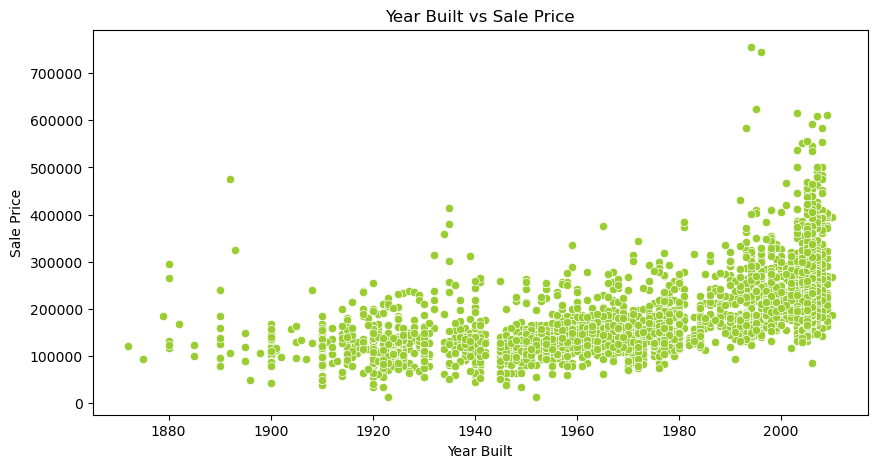

In [82]:
sns.scatterplot(data=df, x='Year Built', y='SalePrice', color='yellowgreen')
plt.title("Year Built vs Sale Price")
plt.ylabel("Sale Price")
plt.savefig("../images/yr_built_vs_sale.png")
# Creates a scatterplot comparing Year Built to Sale Price

> The above scatterplot shows the correlation between the Year the house was built and the Sale Price. There doesn't seem to be much correlation at first, but in the later years, the price starts to get higher quickly. 

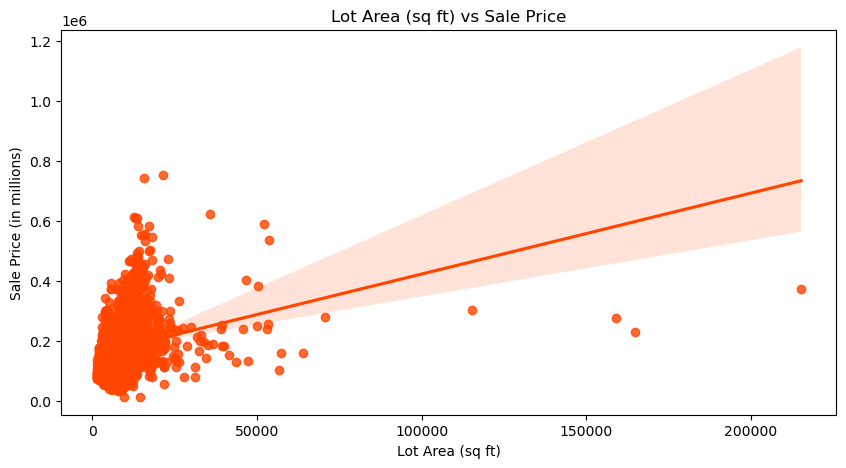

In [83]:
sns.regplot(data=df, x='Lot Area', y='SalePrice', color='orangered')
plt.title("Lot Area (sq ft) vs Sale Price")
plt.ylabel("Sale Price (in millions)")
plt.xlabel("Lot Area (sq ft)")
plt.savefig("../images/lot_area_vs_sale.png")
# Creates a regression plot comparing Lot Area to Sale Price

> The above regplot shows the relationship between Lot Area and Sale Price. We can see that generally, as the Lot Area increases,so does the sale price. There are some exceptions to this however, as seen in the very high lot areas. 

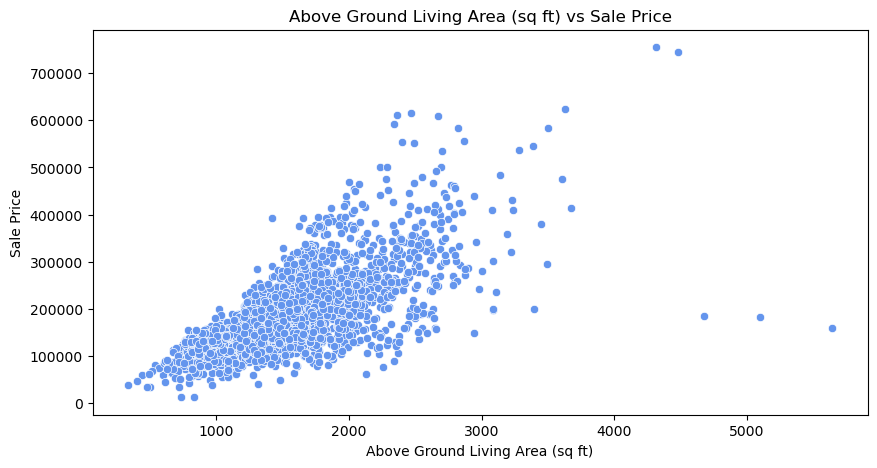

In [84]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', color='cornflowerblue')
plt.title("Above Ground Living Area (sq ft) vs Sale Price")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.savefig("../images/abv_gr_liv_area_vs_sale.png")
# creates a scatterplot compare above ground living area to sale price

> The above scatterplot shows a very clear relationship between Above Ground Living Area and Sale Price. There seems to be a high correlation between the two, so this will be a useful column in training a machine learning model. 

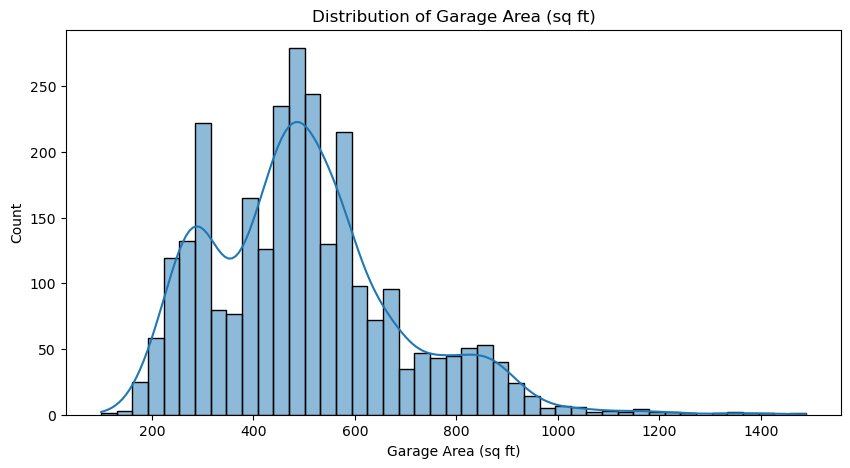

In [85]:
sns.histplot(data=df.loc[df['Garage Area'] > 0, 'Garage Area'], kde=True)
plt.title("Distribution of Garage Area (sq ft)")
plt.xlabel("Garage Area (sq ft)");
plt.savefig("../images/hist_of_garage_area.png")
# Creates a histogram of the distribution of Garage Area (filtering out rows with no garage)

> The above histogram shows the distribution of the Garage Area (sq ft). This is only for houses with a garage, so rows where garage area is 0 where filtered out. THere is mostly a normal distribution, but there are some outliers causing a minor skew. 

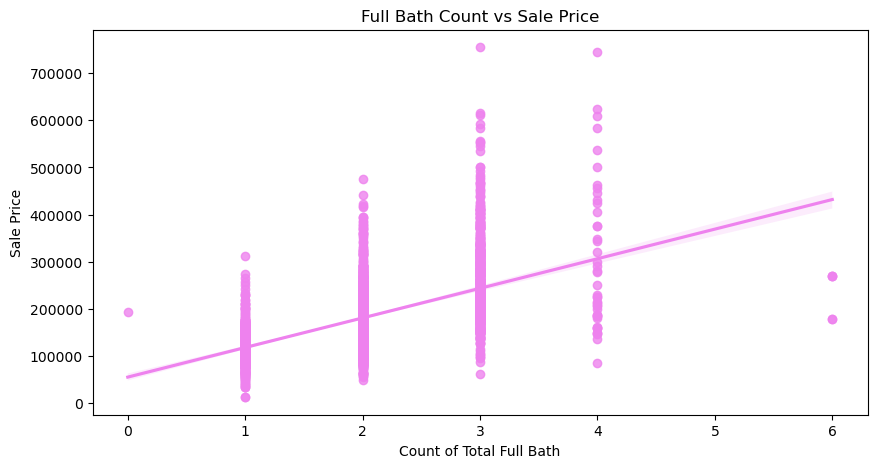

In [86]:
sns.regplot(data=df, x='Total Full Bath', y='SalePrice', color='violet')
plt.title("Full Bath Count vs Sale Price")
plt.xlabel("Count of Total Full Bath")
plt.ylabel("Sale Price")
plt.savefig("../images/full_bath_vs_sale.png")
# creates a regression plot of the total full bath count and sale price

> The above regplot shows the relationship between the Total Full Bath count (above ground and basement) and Sale Price. There seems to be a strong correlation between the the number of full baths and Sale Price

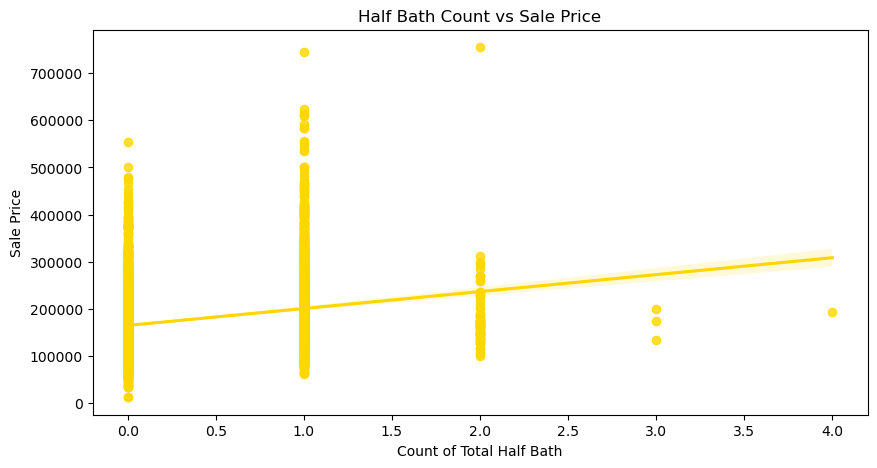

In [87]:
sns.regplot(data=df, x='Total Half Bath', y='SalePrice', color='gold')
plt.title("Half Bath Count vs Sale Price")
plt.xlabel("Count of Total Half Bath")
plt.ylabel("Sale Price")
plt.savefig("../images/half_bath_vs_sale.png")
# creates a regression plot of the total full bath count and sale price

> The correlation between the total number of half baths and Sale Price is not as strong as Full Bath, but still may be useful. 

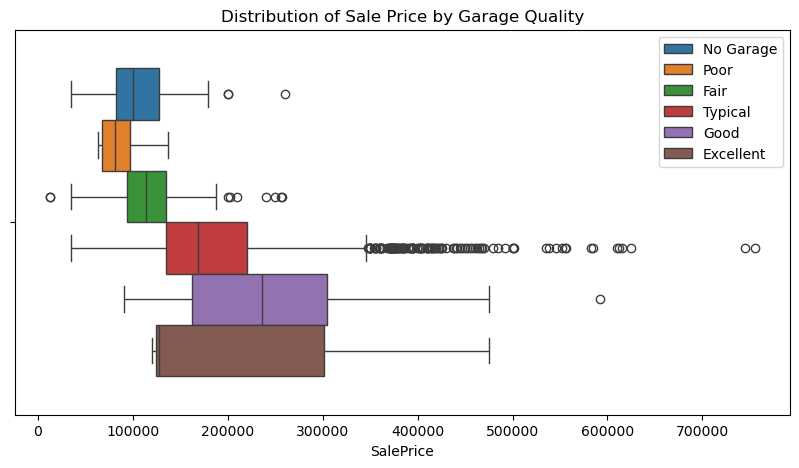

In [88]:
sns.boxplot(data=df, x='SalePrice', hue='Garage Qual')
plt.title("Distribution of Sale Price by Garage Quality")
plt.legend(labels=['No Garage', 'Poor', 'Fair', 'Typical', 'Good', 'Excellent'])
plt.savefig("../images/garage_qual_sale_dist.png")
# creates boxplots grouped by Garage Quality, and updates the legend to have full label names

> The above boxplots show the distribution of Sale Price, grouped by the Garage Quality. The sale prices for typical garages seem to get higher than excellent garages,but the spread of excellent is better than that of typical. 

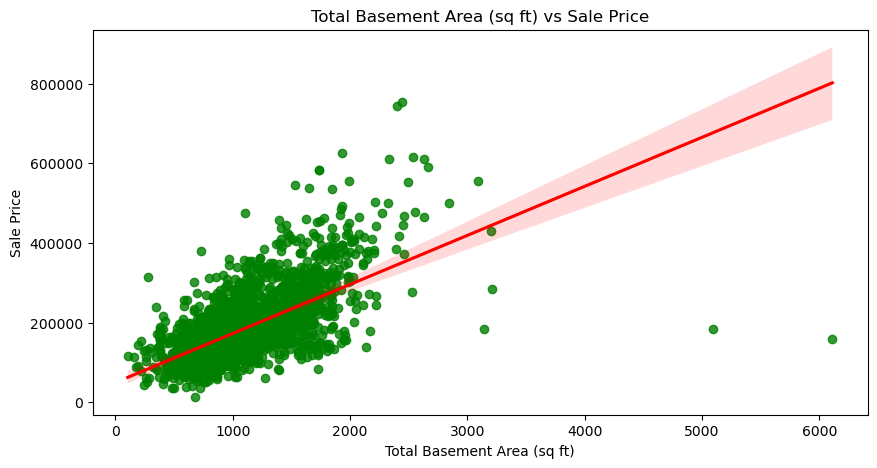

In [89]:
sns.regplot(data=df.loc[df['Total Bsmt SF'] > 0, :], x='Total Bsmt SF', y='SalePrice', color='green', line_kws={'color': 'red'})
plt.title("Total Basement Area (sq ft) vs Sale Price")
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("Sale Price")
plt.savefig("../images/bsmt_area_vs_sale.png")
# creates a regression plot, comparing the total basement square footage and sale price

> The above shows the relationship between basement area and sale price. THere is a strong correlation here it seems, however, it does not include houses without a basement. When done in machine learning, those will need to be included to get a better training, but it is still important to see how they relate. 

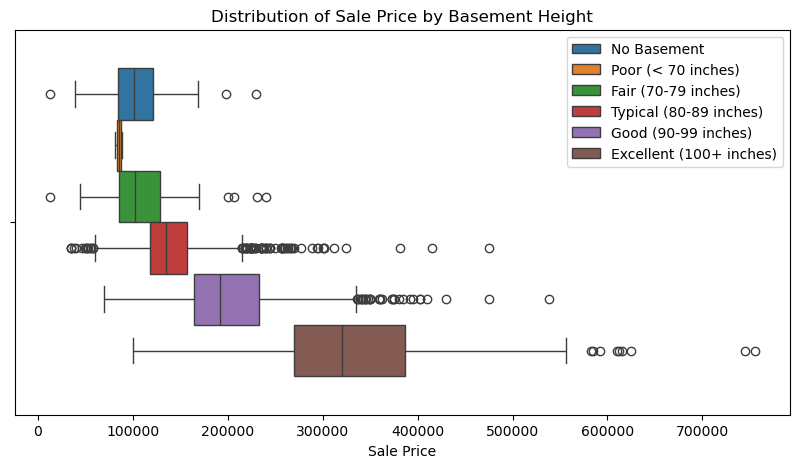

In [90]:
sns.boxplot(data=df, x='SalePrice', hue='Bsmt Qual')
plt.title("Distribution of Sale Price by Basement Height")
plt.xlabel("Sale Price")
plt.legend(labels=["No Basement","Poor (< 70 inches)", "Fair (70-79 inches)", "Typical (80-89 inches)", "Good (90-99 inches)", "Excellent (100+ inches)"])
plt.savefig("../images/base_height_sale_dist.png")
# creates boxplots grouped by Garage Quality, and updates the legend to have descriptive label names

> The above boxplots show the distribution of the sale price, grouped by Basement Height. It seems the higher the basement, the more the house costs. 

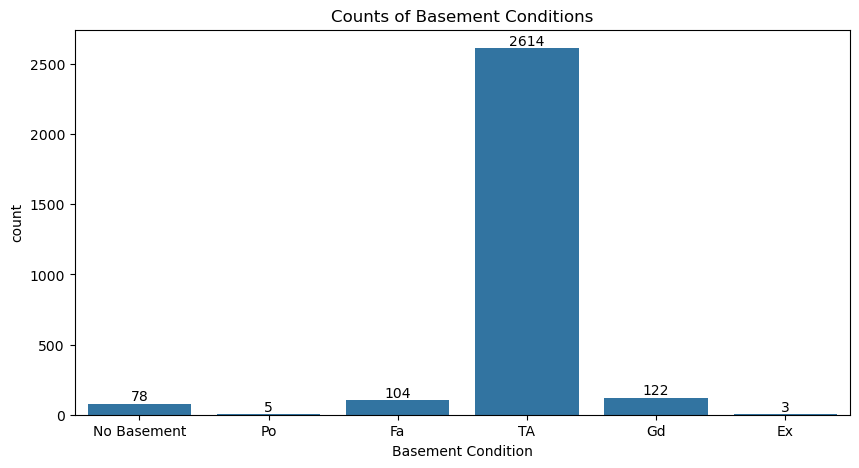

In [91]:
ax = sns.countplot(data=df, x='Bsmt Cond')
ax.bar_label(ax.containers[0])
plt.title("Counts of Basement Conditions")
plt.xlabel("Basement Condition")
plt.savefig("../images/count_of_base_cond.png")
# creates a countplot of the different basement conditions

> The above is a countplot showing the number of each condition of the basement. Most basements are typical. 

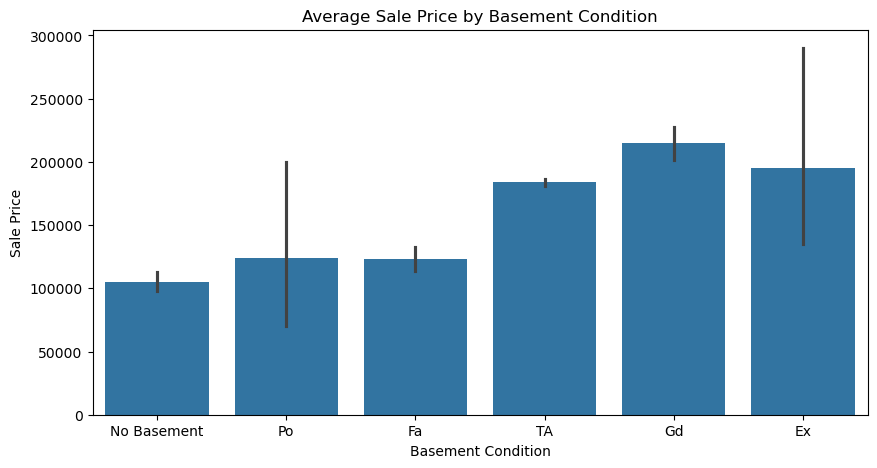

In [92]:
sns.barplot(data=df, x='Bsmt Cond', y='SalePrice', estimator='mean')
plt.title("Average Sale Price by Basement Condition")
plt.xlabel("Basement Condition")
plt.ylabel("Sale Price")
plt.savefig("../images/avg_sale_by_base_cond.png")
# creates a barplot showing the mean sale price by basement conditions

> The above barplot shows the sale price for each basement condition, from no basement to excellent condition. For the most part, good basements cost more money, but this may be due to a lack of excellent basements, which we say before only had 3. 

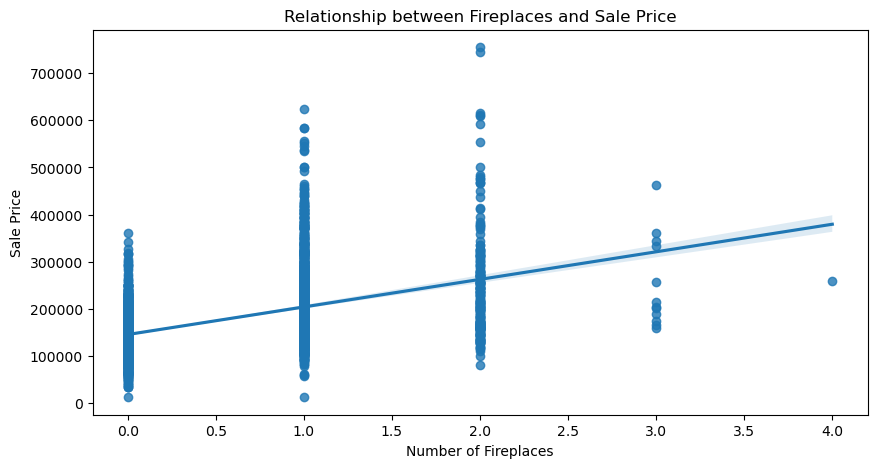

In [93]:
sns.regplot(data=df, x='Fireplaces', y='SalePrice')
plt.title("Relationship between Fireplaces and Sale Price")
plt.xlabel("Number of Fireplaces")
plt.ylabel("Sale Price")
plt.savefig("../images/fireplace_vs_sale.png")
# creates a regression plot between fireplaces and sale price

> This regplo shows the correlation between the number of fireplaces and sale price. There seems to be a moderate correlation between the 2. 

In [94]:
for col in ordinal_columns:
    df[f"{col}_codes"] = df[col].cat.codes
    # this is creating the category codes for the ordinal columns, so we can start to make comparisons to the sale price

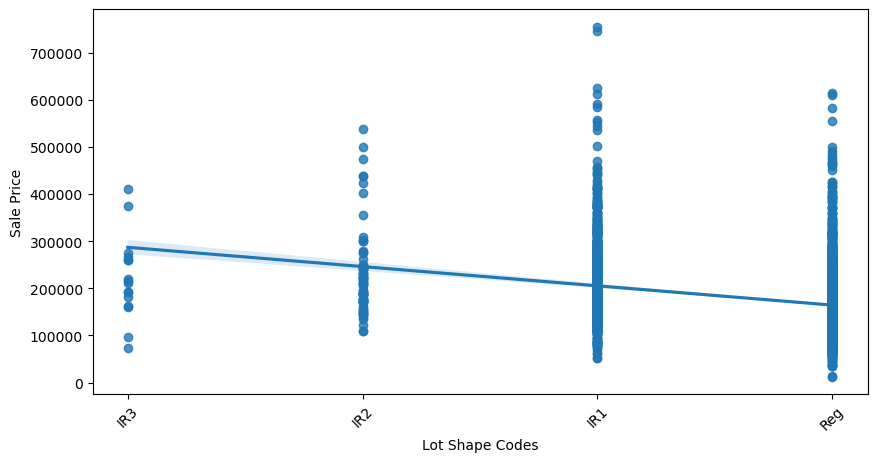

In [95]:
sns.regplot(data=df, x='Lot Shape_codes', y='SalePrice')
plt.xlabel("Lot Shape Codes")
plt.ylabel("Sale Price")
plt.xticks(
    ticks=range(len(df['Lot Shape'].cat.categories)),
    labels=df['Lot Shape'].cat.categories,
    rotation=45
);
plt.savefig("../images/lot_shape_vs_sale.png")
# creates a regression plot comparing the Lot Shape (codes) and the Sale Price

> There seems to be a downward trend in the relationship between lot shape and sale price. This goes from Very Irregular to Regular, so it seems that the more regular a lot shape is, the less it costs. 

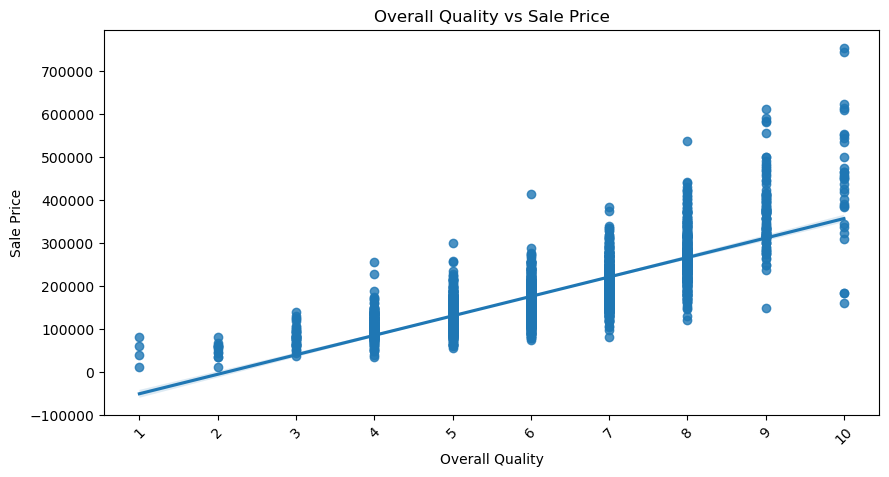

In [96]:
sns.regplot(data=df, x='Overall Qual_codes', y='SalePrice')
plt.title("Overall Quality vs Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.xticks(
    ticks=range(len(df['Overall Qual'].cat.categories)),
    labels=df['Overall Qual'].cat.categories,
    rotation=45
);
plt.savefig("../images/overall_qual_vs_sale.png")
# creates a regression plot comparing the Overall House Quality (codes) and the Sale Price

> This regplot shows a very clear positive correlation between overall quality and sale price. As the quality goes up, so does the sale price.

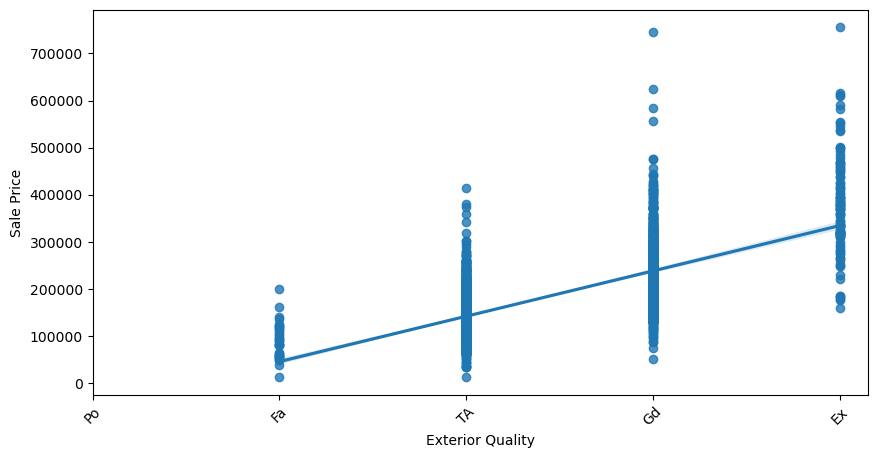

In [97]:
sns.regplot(data=df, x='Exter Qual_codes', y='SalePrice')
plt.xlabel("Exterior Quality")
plt.ylabel("Sale Price")
plt.xticks(
    ticks=range(len(df['Exter Qual'].cat.categories)),
    labels=df['Exter Qual'].cat.categories,
    rotation=45
);
plt.savefig("../images/exter_qual_vs_sale.png")
# creates a regression plot comparing the Exterior Quality (codes) and the Sale Price

> We can see here the same thing, that as the quality of te exterior improves, th higher the price of the house is. 

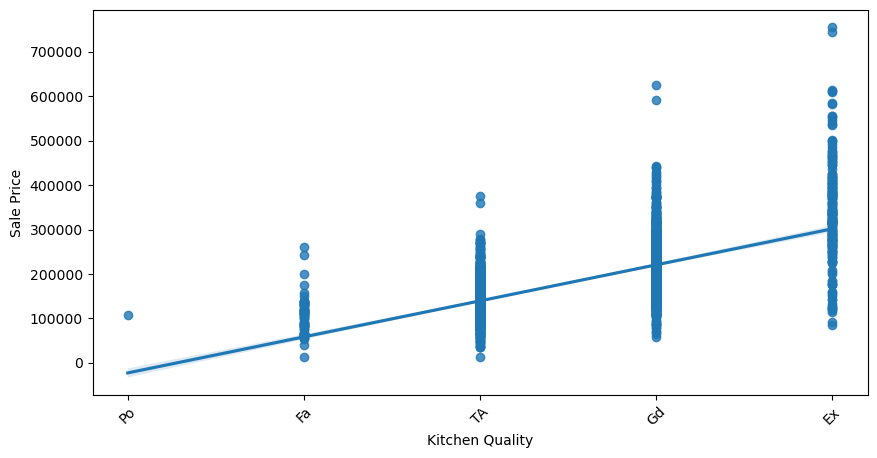

In [98]:
sns.regplot(data=df, x='Kitchen Qual_codes', y='SalePrice')
plt.xlabel("Kitchen Quality")
plt.ylabel("Sale Price")
plt.xticks(
    ticks=range(len(df['Kitchen Qual'].cat.categories)),
    labels=df['Kitchen Qual'].cat.categories,
    rotation=45
);
plt.savefig("../images/kitchen_qual_vs_sale.png")
# creates a regression plot comparing the Kitchen Quality (codes) and the Sale Price

> We can see here the same thing with kitchen as well, that houses with quality kitchens are pricier. 

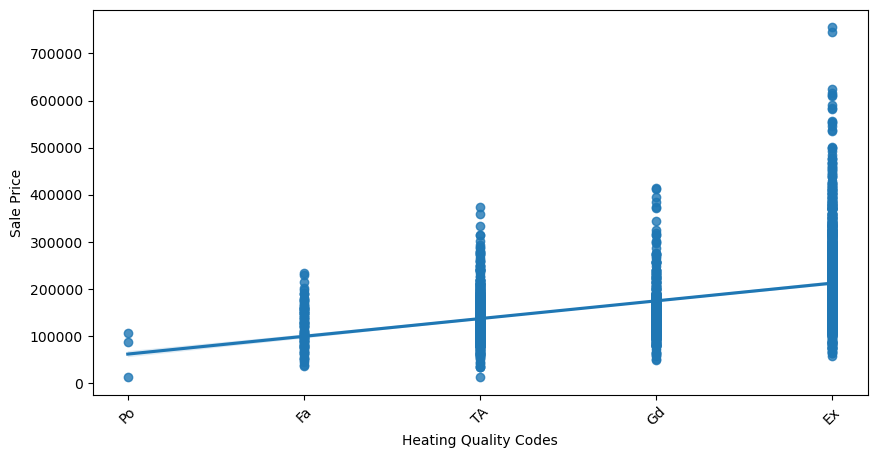

In [99]:
sns.regplot(data=df, x='Heating QC_codes', y='SalePrice')
plt.xticks(
    ticks=range(len(df['Heating QC'].cat.categories)),
    labels=df['Heating QC'].cat.categories,
    rotation=45
);
plt.xlabel("Heating Quality Codes")
plt.ylabel("Sale Price")
plt.savefig("../images/heat_qual_vs_sale.png")
# creates a regression plot comparing the Heating Quality (codes) and the Sale Price

> Here we can see the regplot of the heating quality vs the sale price. WEe can see the correlation is positive, but it isn't too high. 

In [100]:
saleprice_corrs = df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False)
# creates the correlations between all the numeric columns and the SalePrice

<Axes: >

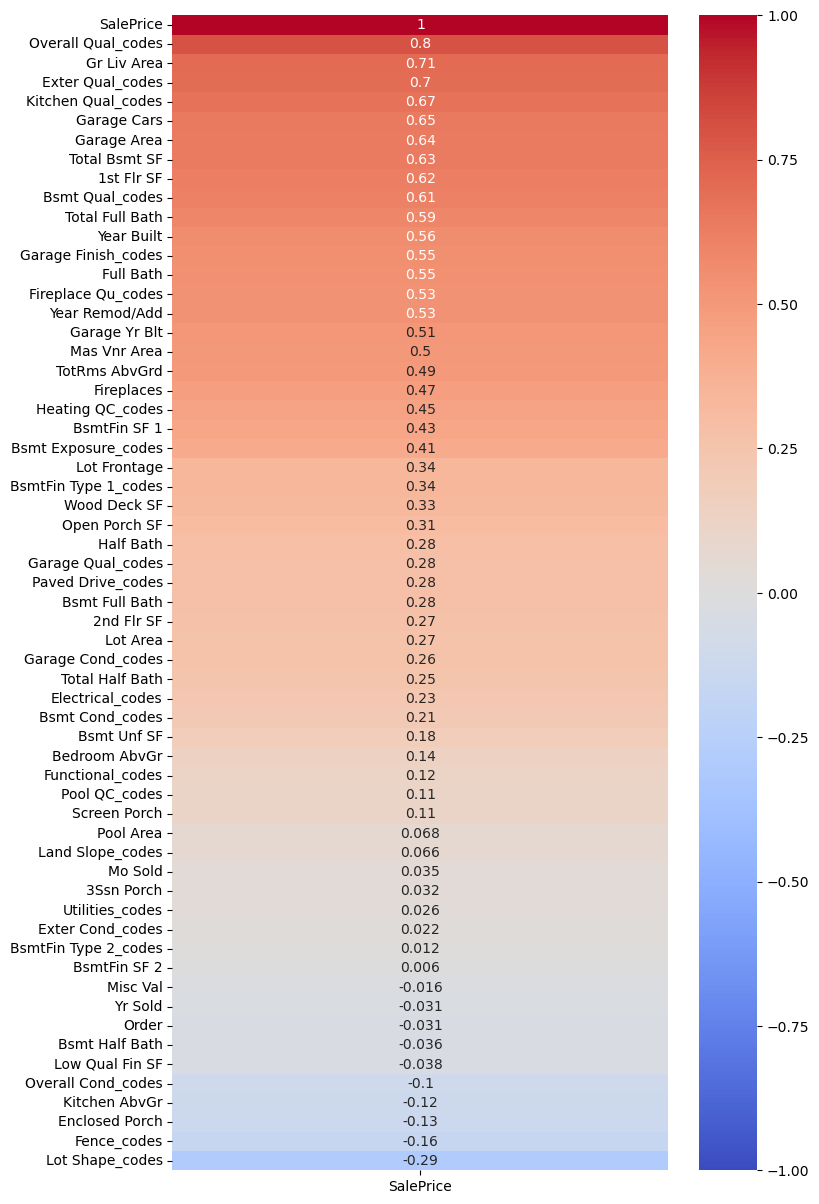

In [101]:
plt.figure(figsize=(8, 15))
sns.heatmap(saleprice_corrs,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)
# creates a heatmap of the previously made correlation map

> This is a heatmap showing the correlation coeffiecents between the saleprice and the numerical columns. Nominal columns will be looked at in the modeling notebook

## Notes

Garage Yr Blt - Has an incorrect outlier at index 2260 (says 2207 for the year)

In [102]:
df.to_csv('../data/cleaned_ameshousing.csv', index=False)
# creates a new csv file of the cleaned dataset. 